## Project: Predicting Listing Gains in the Indian IPO Market Using TensorFlow

In this project we will build a deep learning classification model to determine if there will be listing gains (percentage increase in the share price of a company from its Initial Public Offerings (IPO) issue price on the day of listing) for the IPO in the Indian market.
We'll cover all the major steps of the modeling pipeline, starting with exploratory data analysis, then moving on to visualizing the important variables, then finally creating a deep learning classification model.

![](https://images.unsplash.com/photo-1518186285589-2f7649de83e0?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1974&q=80)
__Photo by Chris Liverani on Unsplash__

### Loading the Libaries and the Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(100)
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv("C:/Users/Denisa/Desktop/Project Apps/project 25/Indian_IPO_Market_Data.csv")

### Data Dictionary

The data consists of following columns:

* _Date_: date when the IPO was listed

* _IPOName_: name of the IPO

* _Issue_Size_: size of the IPO issue, in INR Crores

* _Subscription_QIB_: number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category

* _Subscription_HNI_: number of times the IPO was subscribed by the HNI (High Networth Individual) investor category

* _Subscription_RII_: number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category

* _Subscription_Total_: total number of times the IPO was subscribed overall

* _Issue_Price_: the price in INR at which the IPO was issued

* _Listing_Gains_Percent_: is the percentage gain in the listing price over the issue price

### Exploring the Data

In [3]:
print(df.shape)
df.head()

(319, 9)


,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


In [5]:
#the summary statistics for all variables of the dataset
df.describe(include='all')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Infinite Comp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000


The outcome variable is `Listing_Gains_Percent`

In [6]:
df.isnull().sum()

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
dtype: int64

We want to  build a deep learning classification model, but the  target variable is continuous. Next we will create a 
categorical target variable, Listing_Gains_Profit, which takes the binary values 1 when Listing_Gains_Percent is positive and 0 otherwise.

In [7]:
df['Listing_Gains_Profit'] = np.where(df['Listing_Gains_Percent'] > 0, 1, 0)

In [8]:
df['Listing_Gains_Profit'].value_counts(normalize=True)

1    0.545455
0    0.454545
Name: Listing_Gains_Profit, dtype: float64

We can see approximately 55% of the IPOs listed in profit, and we can also see that the data is fairly balanced.

Next we will drop columns `Date`, `IPOName` because they have many unique values so we consider that these variables do not add predictive power to the model.We will also drop 'Listing_Gains_Percent' now that we have 'Listing_Gains_profit'

In [9]:
df = df.drop(['Date ', 'IPOName', 'Listing_Gains_Percent'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Issue_Size            319 non-null    float64
 1   Subscription_QIB      319 non-null    float64
 2   Subscription_HNI      319 non-null    float64
 3   Subscription_RII      319 non-null    float64
 4   Subscription_Total    319 non-null    float64
 5   Issue_Price           319 non-null    int64  
 6   Listing_Gains_Profit  319 non-null    int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 16.3 KB


### Data Visualization

Although the summary statistics above provides important information about the variables of our dataset, we will also visualize data to see patterns and relationships in data that we might not be able to discern just by looking at these summary statistics.

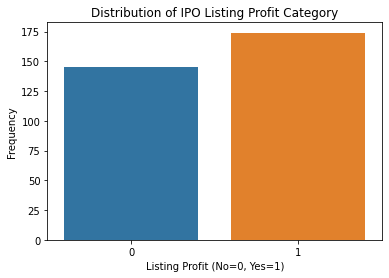

In [10]:
#Create a countplot to visualize the distribution of the target variable
sns.countplot(x='Listing_Gains_Profit', data=df)
plt.title('Distribution of IPO Listing Profit Category')
plt.xlabel('Listing Profit (No=0, Yes=1)')
plt.ylabel('Frequency')
plt.show()

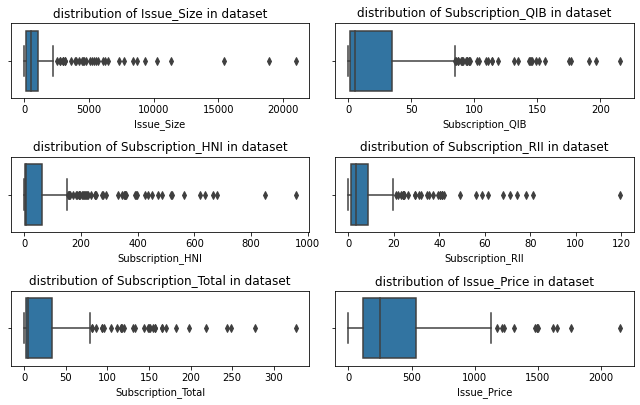

In [11]:
#Use plots to check for the presence of outliers in each of the continuous variables of the dataset.

# set figsize
plt.figure(figsize=(9,9))
columns=['Issue_Size','Subscription_QIB','Subscription_HNI','Subscription_RII','Subscription_Total','Issue_Price']
# loop through column names and plot distributions
for i, col in enumerate(columns):

  # set subplot
  plt.subplot(5,2,i+1)

  # seaborn boxplot
  sns.boxplot(data=df, x=col)
  plt.title(f'distribution of {col} in dataset')

# minimize risk of subplots overlapping
plt.tight_layout()

# show final plot after subplots finished generating
plt.show()  

From the boxplots above we can notice the presence of outliers in several numerical variables

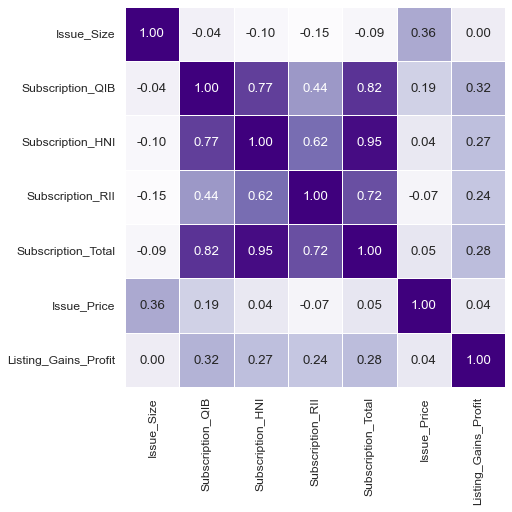

In [12]:
#check the relationship between your selected predictor variables and the target variable
# Evaluating the correlation between variables 
plt.figure(figsize=(7,7))
correlations = df.corr()

sns.set(font_scale=1.1)

sns.heatmap(correlations,
            annot=True,
            fmt='.2f',
            cmap='Purples',
            square=True,
            linewidths=1,
            cbar=False)

plt.show()

In [13]:
# Gets correlations with the target variable
correlations['Listing_Gains_Profit'].sort_values(ascending=False)

Listing_Gains_Profit    1.000000
Subscription_QIB        0.323499
Subscription_Total      0.283340
Subscription_HNI        0.271879
Subscription_RII        0.240842
Issue_Price             0.039548
Issue_Size              0.004717
Name: Listing_Gains_Profit, dtype: float64

In [14]:
#check if there are correlations between predictor variables
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)
df.drop(to_drop, axis=1, inplace=True)

['Subscription_Total']


### Outlier Treatment

Rather than using an exploratory data visualization, we can use a quantifiable measure to detect the presence of outliers:the IQR value. We will remove the datapoints that are outside the 1.5 times of an interquartile range (IQR) from the upper and lower quartiles.

In [15]:
columns=['Issue_Size','Subscription_QIB','Subscription_HNI','Subscription_RII','Issue_Price']

In [16]:
for col in columns:
    q1=df[col].quantile(q=0.25)
    q2=df[col].quantile(q=0.5)
    q3=df[col].quantile(q=0.75)
    iqr=q3-q1
    lower=(q1-1.5*iqr)
    upper=q3+1.5*iqr
    num_outliers =sum((df[col] < lower) | (df[col] > upper))
    df[col].clip(lower,upper)
    print(f"We removed {num_outliers} from the {col} column.")

We removed 34 from the Issue_Size column.
We removed 35 from the Subscription_QIB column.
We removed 48 from the Subscription_HNI column.
We removed 33 from the Subscription_RII column.
We removed 12 from the Issue_Price column.


### Setting the Target and Predictor Variables

In this stage of the project we will set the target and predictor variables and bring the predictor variable values to a uniform scale by performing normalization

In [17]:
target_variable = ['Listing_Gains_Profit'] 
predictors = list(set(list(df.columns)) - set(target_variable))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Issue_Price,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.056803,0.119212,0.073159,0.071681,0.174478,0.545455
std,0.113554,0.188985,0.148689,0.121472,0.164604,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.008048,0.005338,0.001310,0.010675,0.055349,0.000000
50%,0.023631,0.022929,0.005292,0.028634,0.116279,1.000000
75%,0.052381,0.160757,0.064813,0.072045,0.249302,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Creating the Holdout Validation Approach

We will use the holdout validation approach to create your training and test sets based on the ration 70:30 for model evaluation. The deep learning classification model will be fit to the training set, and predictive ability will be assessed on the test set.

In [18]:
X = df[predictors].values
y = df[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

### Define the Deep Learning Classification Model

Next we will:
* Instantiating the model with the Keras Sequential API in TensorFlow

* Add the hidden layers

* Select the activation function

 The model architecture will contain four hidden layers with relu as the activation function. The output layer uses a sigmoid activation function, which is a good choice for a binary classification model. 

In [19]:
# define model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation= 'relu'))
model.add(tf.keras.layers.Dense(8, activation= 'relu'))
model.add(tf.keras.layers.Dense(4, activation= 'relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))    

### Compile and Train the model

Compiling the model requires us to specify the following:

* An optimizer
* A loss function
* An evaluation metric

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 897 (3.50 KB)
Trainable params: 897 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [22]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
7/7 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.4933
Epoch 2/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5471
Epoch 3/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5561
Epoch 4/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5561
Epoch 5/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5561
Epoch 6/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5561
Epoch 7/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5561
Epoch 8/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5561
Epoch 9/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5561
Epoch 10/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5561
Epoch 11/250
7/7 [===========

### Model Evaluation

Now we are ready to evaluate the model's performance:

In [23]:
model.evaluate(X_train, y_train)

7/7 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.7130


[0.5683477520942688, 0.713004469871521]

In [24]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.6067 - accuracy: 0.6979


[0.6066561937332153, 0.6979166865348816]

The accuracy was approximately 71.3% on the training data and 69.7% on the test data.

### Other model architectures

Next we can try out more permutations and combinations with the modeling architecture to possibly improve the model performance even more. 

We can try to use different optimizers and loss functions to see which one improves the model performance. We will use SGD as the optimizer next.

In [25]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model1.add(tf.keras.layers.Dense(16, activation= 'relu'))
model1.add(tf.keras.layers.Dense(8, activation= 'relu'))
model1.add(tf.keras.layers.Dense(4, activation= 'relu'))
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))    

In [26]:
model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['BinaryAccuracy'])

model1.fit(X_train, y_train, epochs=250)

Epoch 1/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6980 - binary_accuracy: 0.4395
Epoch 2/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6964 - binary_accuracy: 0.3857
Epoch 3/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6951 - binary_accuracy: 0.4574
Epoch 4/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6936 - binary_accuracy: 0.4978
Epoch 5/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6925 - binary_accuracy: 0.5336
Epoch 6/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6917 - binary_accuracy: 0.5426
Epoch 7/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6911 - binary_accuracy: 0.5561
Epoch 8/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6908 - binary_accuracy: 0.5516
Epoch 9/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6904 - binary_accuracy: 0.5516
Epoch 10/250
7/7 [==============================] - 0s 2ms/step 

In [27]:
model1.evaluate(X_train, y_train)

7/7 [==============================] - 0s 2ms/step - loss: 0.6389 - binary_accuracy: 0.6368


[0.6388608813285828, 0.6367713212966919]

In [28]:
model1.evaluate(X_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.6355 - binary_accuracy: 0.6562


[0.635453462600708, 0.65625]

The accuracy was approximately 67.7% on the training data and 70.8% on the test data.

Let's try using a different performance metric, we will use AUC ROC since the data is not heavily imbalanced.

In [29]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model2.add(tf.keras.layers.Dense(16, activation= 'relu'))
model2.add(tf.keras.layers.Dense(8, activation= 'relu'))
model2.add(tf.keras.layers.Dense(4, activation= 'relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))    

In [30]:
y_train=tf.cast(y_train, tf.float32)
y_test=tf.cast(y_test, tf.float32)

In [31]:
model2.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.F1Score()])

model2.fit(X_train, y_train, epochs=250)

Epoch 1/250
7/7 [==============================] - 1s 2ms/step - loss: 0.6803 - f1_score: 0.7147
Epoch 2/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6718 - f1_score: 0.7147
Epoch 3/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6517 - f1_score: 0.7147
Epoch 4/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6330 - f1_score: 0.7147
Epoch 5/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6286 - f1_score: 0.7147
Epoch 6/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6280 - f1_score: 0.7147
Epoch 7/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6230 - f1_score: 0.7147
Epoch 8/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6331 - f1_score: 0.7147
Epoch 9/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6312 - f1_score: 0.7147
Epoch 10/250
7/7 [==============================] - 0s 2ms/step - loss: 0.6210 - f1_score: 0.7147
Epoch 11/250
7/7 [===========

In [32]:
model2.evaluate(X_train, y_train)

7/7 [==============================] - 0s 2ms/step - loss: 0.3775 - f1_score: 0.7147


[0.37751147150993347, array([0.71469736], dtype=float32)]

In [33]:
model2.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 2.9604 - f1_score: 0.6897


[2.9604225158691406, array([0.6896552], dtype=float32)]

The accuracy was approximately 71.4% on the training data and 68.4%on the test data.

We can also perform hyperparameter optimization,tuning the learnig rate (potential: 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001 and 0.000001.) tuning te number of layers or the number of nodes and examine the changes in the model accuracy.

### Conclusion

We have built Deep Learning Classification models using the deep learning framework, Keras, in TensorFlow.We used the Sequential API for the classifier algorithm to predict if there will be listing gains and got an accuracy that was approximately 71.3% on the training data and 69.7% on the test data.